# Simple Graph 

In [37]:
import networkx as nx
import pandas as pd

In [12]:
G = nx.Graph()

In [13]:
G.add_nodes_from([1,2,3,4])

In [14]:
G.nodes

NodeView((1, 2, 3, 4))

In [17]:
G.add_edges_from([(1,2), (1,3), (4,1), (2,4)])

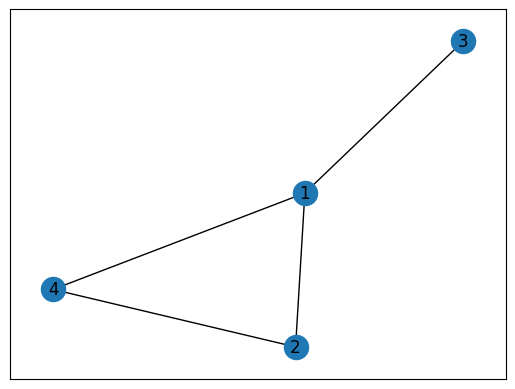

In [18]:
nx.draw_networkx(G)

# Create `ecoli_core` graph 

In [27]:
import pandas as pd
from cobra.io import load_model

model = load_model('textbook')

model

Name,e_coli_core
Memory address,7f332bcbaa90
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [4]:
mets_df = pd.DataFrame(columns=['reactants', 'products'])
mets_df

,reactants,products


### Store metabolites and reactions names 

In [22]:
metabolites = []
for i in model.metabolites: metabolites.append(i.id)

reactions = []
for i in model.reactions: reactions.append(i.id)

In [28]:
for rxn in model.reactions:
    for r in rxn.reactants:
        print(r)

    for p in rxn.products:
        print(p)   

ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
acald_c
coa_c
nad_c
accoa_c
h_c
nadh_c
ACALDt: acald_e <=> acald_c
acald_e
acald_c
ACKr: ac_c + atp_c <=> actp_c + adp_c
ac_c
atp_c
actp_c
adp_c
ACONTa: cit_c <=> acon_C_c + h2o_c
cit_c
acon_C_c
h2o_c
ACONTb: acon_C_c + h2o_c <=> icit_c
acon_C_c
h2o_c
icit_c
ACt2r: ac_e + h_e <=> ac_c + h_c
ac_e
h_e
ac_c
h_c
ADK1: amp_c + atp_c <=> 2.0 adp_c
amp_c
atp_c
adp_c
AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
akg_c
coa_c
nad_c
co2_c
nadh_c
succoa_c
AKGt2r: akg_e + h_e <=> akg_c + h_c
akg_e
h_e
akg_c
h_c
ALCD2x: etoh_c + nad_c <=> acald_c + h_c + nadh_c
etoh_c
nad_c
acald_c
h_c
nadh_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
atp_c
h2o_c
adp_c
h_c
pi_c
ATPS4r: adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
adp_c
h_e
pi_c
atp_c
h2o_c
h_c
Biomass_Ecoli_core: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c

In [33]:
rxn = model.reactions[0]
rxn.reaction

'acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c'

In [55]:
reactants = []
for r in rxn.reactants: reactants.append(r.id)

products = []
for p in rxn.products: products.append(p.id)

# new_row = {'reactants':, 'products':}
import itertools  

pairs = list(itertools.product(reactants, products))

del reactants
del products

for item in pairs:
    print(pairs)
    new_row = {'reactants':item[0], 'products':item[1]}

mets_df = mets_df.append(new_row, ignore_index=True)

[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('acald_c', 'nadh_c'), ('coa_c', 'accoa_c'), ('coa_c', 'h_c'), ('coa_c', 'nadh_c'), ('nad_c', 'accoa_c'), ('nad_c', 'h_c'), ('nad_c', 'nadh_c')]
[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('acald_c', 'nadh_c'), ('coa_c', 'accoa_c'), ('coa_c', 'h_c'), ('coa_c', 'nadh_c'), ('nad_c', 'accoa_c'), ('nad_c', 'h_c'), ('nad_c', 'nadh_c')]
[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('acald_c', 'nadh_c'), ('coa_c', 'accoa_c'), ('coa_c', 'h_c'), ('coa_c', 'nadh_c'), ('nad_c', 'accoa_c'), ('nad_c', 'h_c'), ('nad_c', 'nadh_c')]
[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('acald_c', 'nadh_c'), ('coa_c', 'accoa_c'), ('coa_c', 'h_c'), ('coa_c', 'nadh_c'), ('nad_c', 'accoa_c'), ('nad_c', 'h_c'), ('nad_c', 'nadh_c')]
[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('acald_c', 'nadh_c'), ('coa_c', 'accoa_c'), ('coa_c', 'h_c'), ('coa_c', 'nadh_c'), ('nad_c', 'accoa_c'), ('nad_c', 'h_c'), ('nad_c', 'nadh_c')]
[('acald_c', 'accoa_c'), ('acald_c', 'h_c'), ('aca

In [57]:
pairs

[('acald_c', 'accoa_c'),
 ('acald_c', 'h_c'),
 ('acald_c', 'nadh_c'),
 ('coa_c', 'accoa_c'),
 ('coa_c', 'h_c'),
 ('coa_c', 'nadh_c'),
 ('nad_c', 'accoa_c'),
 ('nad_c', 'h_c'),
 ('nad_c', 'nadh_c')]

In [3]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx
import cobra


Name,e_coli_core
Memory address,7ff59f717100
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [67]:
met_to_rxns = {}
for met in model.metabolites:
    met_to_rxns[met.id] = [rxn.id for rxn in met.reactions]
    
met_to_rxns.keys()

dict_keys(['13dpg_c', '2pg_c', '3pg_c', '6pgc_c', '6pgl_c', 'ac_c', 'ac_e', 'acald_c', 'acald_e', 'accoa_c', 'acon_C_c', 'actp_c', 'adp_c', 'akg_c', 'akg_e', 'amp_c', 'atp_c', 'cit_c', 'co2_c', 'co2_e', 'coa_c', 'dhap_c', 'e4p_c', 'etoh_c', 'etoh_e', 'f6p_c', 'fdp_c', 'for_c', 'for_e', 'fru_e', 'fum_c', 'fum_e', 'g3p_c', 'g6p_c', 'glc__D_e', 'gln__L_c', 'gln__L_e', 'glu__L_c', 'glu__L_e', 'glx_c', 'h2o_c', 'h2o_e', 'h_c', 'h_e', 'icit_c', 'lac__D_c', 'lac__D_e', 'mal__L_c', 'mal__L_e', 'nad_c', 'nadh_c', 'nadp_c', 'nadph_c', 'nh4_c', 'nh4_e', 'o2_c', 'o2_e', 'oaa_c', 'pep_c', 'pi_c', 'pi_e', 'pyr_c', 'pyr_e', 'q8_c', 'q8h2_c', 'r5p_c', 'ru5p__D_c', 's7p_c', 'succ_c', 'succ_e', 'succoa_c', 'xu5p__D_c'])

In [69]:
for m in met_to_rxns.keys():
    print(met_to_rxns[m])

['PGK', 'GAPD']
['PGM', 'ENO']
['PGK', 'Biomass_Ecoli_core', 'PGM']
['GND', 'PGL']
['G6PDH2r', 'PGL']
['ACt2r', 'ACKr']
['ACt2r', 'EX_ac_e']
['ACALD', 'ALCD2x', 'ACALDt']
['ACALDt', 'EX_acald_e']
['PTAr', 'PDH', 'CS', 'PFL', 'ACALD', 'Biomass_Ecoli_core', 'MALS']
['ACONTa', 'ACONTb']
['PTAr', 'ACKr']
['SUCOAS', 'GLNS', 'PFK', 'ACKr', 'Biomass_Ecoli_core', 'ADK1', 'ATPS4r', 'PGK', 'ATPM', 'GLNabc', 'PYK', 'PPCK']
['AKGt2r', 'Biomass_Ecoli_core', 'AKGDH', 'ICDHyr', 'GLUDy', 'GLUSy']
['EX_akg_e', 'AKGt2r']
['PPS', 'ADK1']
['SUCOAS', 'GLNS', 'PFK', 'ACKr', 'Biomass_Ecoli_core', 'ADK1', 'PPS', 'ATPS4r', 'PGK', 'ATPM', 'GLNabc', 'PYK', 'PPCK']
['ACONTa', 'CS']
['PDH', 'CO2t', 'AKGDH', 'GND', 'ICDHyr', 'ME2', 'PPC', 'ME1', 'PPCK']
['EX_co2_e', 'CO2t']
['PDH', 'SUCOAS', 'AKGDH', 'Biomass_Ecoli_core', 'PTAr', 'CS', 'PFL', 'ACALD', 'MALS']
['FBA', 'TPI']
['TKT2', 'Biomass_Ecoli_core', 'TALA']
['ETOHt2r', 'ALCD2x']
['ETOHt2r', 'EX_etoh_e']
['FRUpts2', 'PGI', 'FBP', 'TKT2', 'PFK', 'Biomass_Ecoli_c

In [4]:
G = nx.Graph()
G.add_nodes_from()

In [18]:
nodes = []
for metabolite in model.metabolites:
    nodes.append(metabolite.id)
    
len(nodes)

72

In [44]:
for rxn in model.reactions:
    print(len(list(rxn.metabolites.keys())))

6
2
4
3
3
4
3
6
4
5
5
6
23
2
6
6
4
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
4
4
2
4
4
3
4
5
6
4
7
7
7
4
6
4
5
2
5
3
5
6
4
5
5
5
6
4
2
2
6
5
4
2
4
4
2
4
6
5
7
4
5
4
2
2
4
4
4
6
4
6
4
4
2
